## <span style="color: #89CFF0">Profit prediction</span>



<span style="color: #89CFF0">Consider the dataset 50_Startups.csv which contains data for companies' profit etc.</span>

<span style="color: #89CFF0">0) Read the dataset into pandas dataframe paying attention to file delimeter.</span>


In [2]:
import pandas as pd 
df  = pd.read_csv('50_Startups.csv', delimiter=',')


<span style="color: #89CFF0">1) Identify the variables inside the dataset</span>


In [3]:
df.keys()

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   State            50 non-null     object 
 4   Profit           50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [5]:
df.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [6]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [7]:
df = df.rename({'R&D Spend':'RDS','Administration':'ADMS','Marketing Spend':'MKTS'},axis=1)
df.head()

,RDS,ADMS,MKTS,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94



<span style="color: #89CFF0">2) Investigate the correlation between the variables</span>


In [8]:
# copy of the DataFrame
df_copy = df.copy()

In [9]:
import warnings
warnings.filterwarnings("ignore")

state_mapping = {
    'New York': 1,
    'California': 2,
    'Florida': 3,
}

df_copy['State'] = df_copy['State'].replace(state_mapping)

In [10]:
corr = df_copy.corr()
corr.round(3)

,RDS,ADMS,MKTS,State,Profit
RDS,1.000,0.242,0.724,0.038,0.973
ADMS,0.242,1.000,-0.032,0.003,0.201
MKTS,0.724,-0.032,1.000,0.138,0.748
State,0.038,0.003,0.138,1.000,0.048
Profit,0.973,0.201,0.748,0.048,1.000


In [11]:
correlation_matrix = df_copy.corr(method='pearson')
target_correlation = correlation_matrix['Profit'].drop('Profit')


In [12]:
target_correlation.to_frame().T.round(4)

,RDS,ADMS,MKTS,State
Profit,0.9729,0.2007,0.7478,0.0485



<span style="color: #89CFF0">3) Choose appropriate variables to predict company profit. Justify your choice.</span>


In [13]:
X = df[['RDS','MKTS','ADMS']]
y = df.Profit


<span style="color: #89CFF0">4) Plot explanatory variables against profit in order to confirm (close to) linear dependence</span>


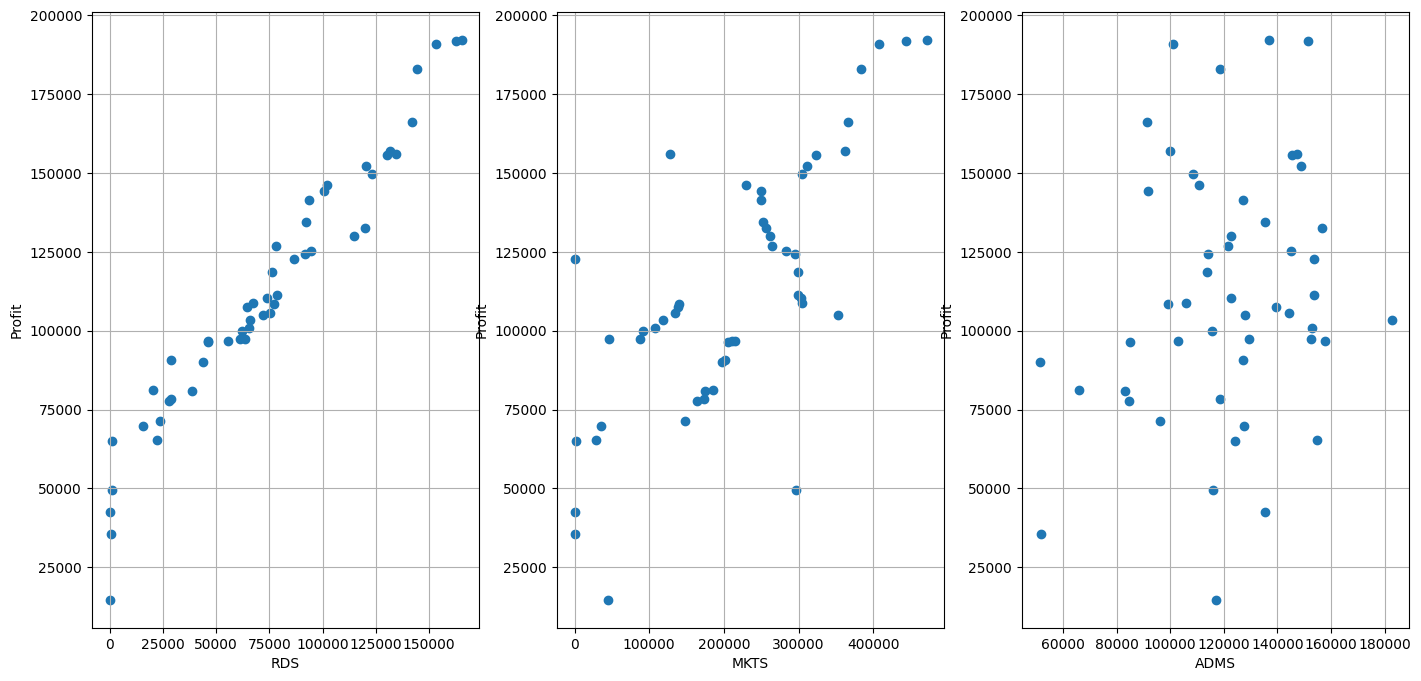

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(17, 8))
plt.subplot(1,3,1)
plt.scatter(X['RDS'], y)
plt.xlabel('RDS')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(1,3,2)
plt.scatter(X['MKTS'], y)
plt.xlabel('MKTS')
plt.ylabel('Profit')
plt.grid(True)

plt.subplot(1,3,3)
plt.scatter(X['ADMS'], y)
plt.xlabel('ADMS')
plt.ylabel('Profit')
plt.grid(True)
plt.show()

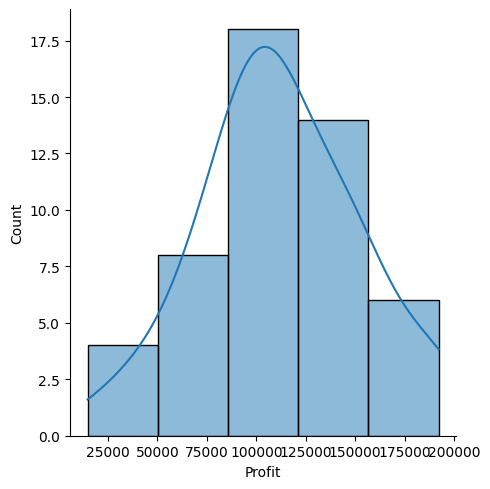

In [15]:
import seaborn as sns

df1 = pd.concat([X, y], axis = 1) 

sns.displot(df1['Profit'],bins=5,kde=True)

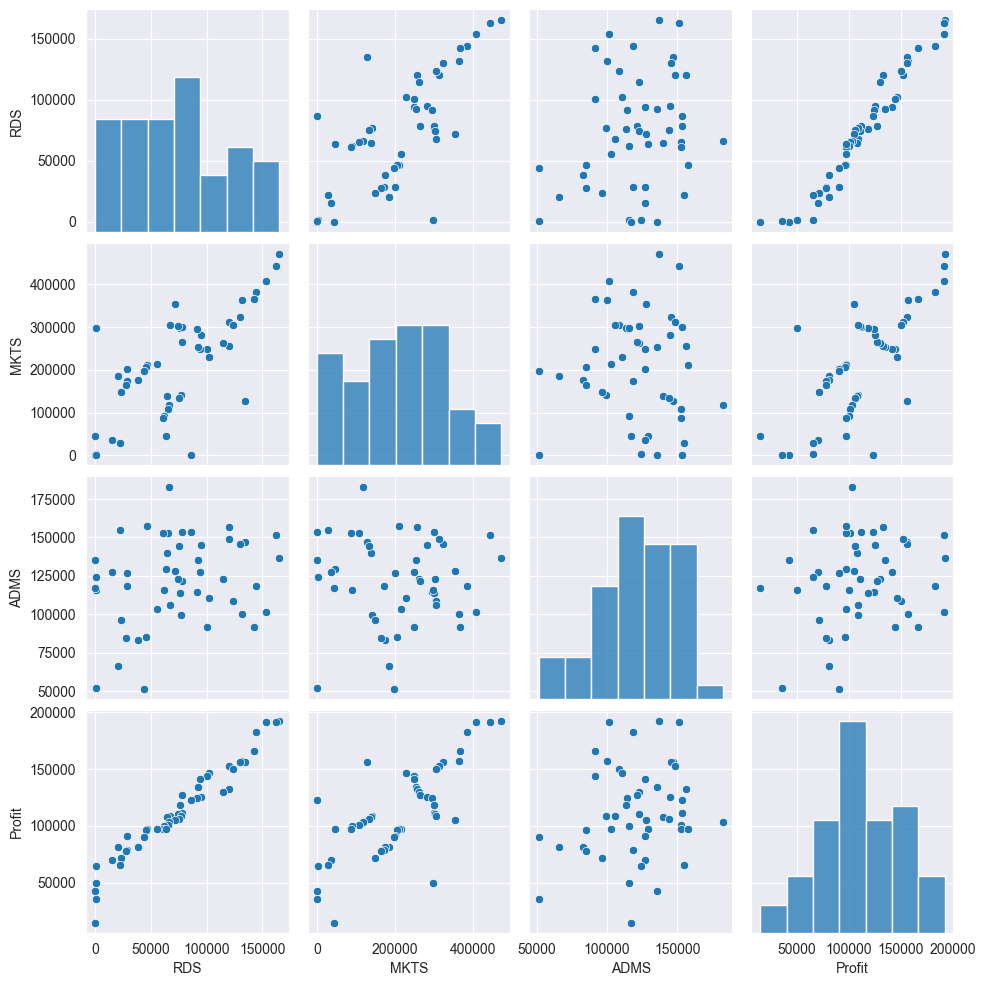

In [16]:
sns.set_style(style='darkgrid')
sns.pairplot(df1)


<span style="color: #89CFF0">5) Form training and testing data (80/20 split)</span>


In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state=42)


<span style="color: #89CFF0">6) Train linear regression model with training data</span>


In [18]:
from sklearn.linear_model import LinearRegression

model = LinearRegression().fit(X_train, y_train)


<span style="color: #89CFF0">7) Compute RMSE and R2 values for training and testing data separately</span>


In [19]:
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score

def raport(a, b):
    rmse = np.sqrt(mean_squared_error(b, model.predict(a)))
    r2 = r2_score(b, model.predict(a))

    return {'rmse': rmse, 'r2': r2}

In [20]:
raport(X_test, y_test)

{'rmse': 8995.905803361422, 'r2': 0.9000653083037319}

In [21]:
raport(X_train, y_train)

{'rmse': 8938.013440232062, 'r2': 0.9535927757257411}

<span style="color: #89CFF0"> Profit Distribution by State</span>

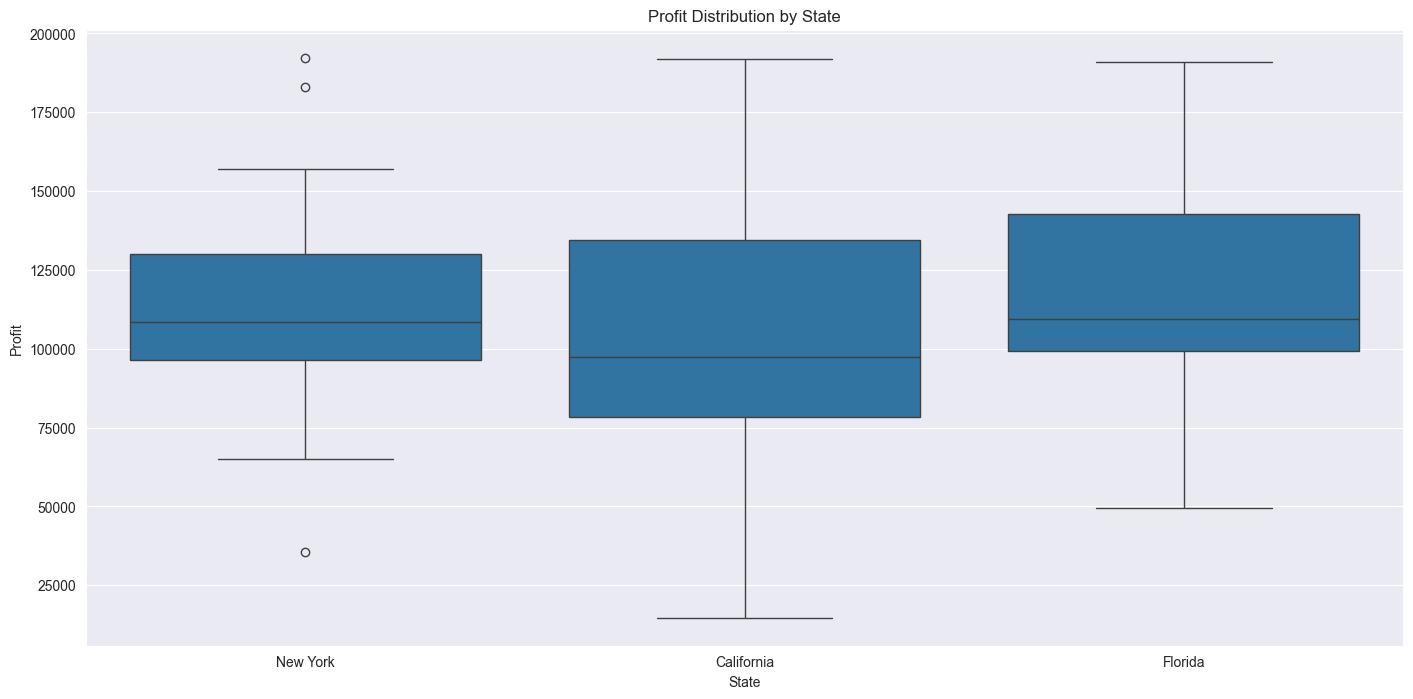

In [22]:
plt.figure(figsize=(17, 8))
sns.boxplot(x='State', y='Profit', data=df)
plt.xlabel('State')
plt.ylabel('Profit')
plt.title('Profit Distribution by State')
plt.show()